In [1]:
import numpy as np  #importing numpy
import pandas as pd #importing pandas
import matplotlib.pyplot as plt #importing matplotlib
import seaborn as sns #importing seaborn for diagrams
from sklearn.model_selection import train_test_split  #importing scikit for train/test split
from sklearn.preprocessing import StandardScaler, LabelEncoder #importing data preprocessing tools from scikit
from sklearn.linear_model import LinearRegression #importing Linear Regression from scikit
from sklearn.metrics import mean_squared_error, r2_score  #importing RMSE and regression score output tool from scikit

In [2]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"  #Load dataset directly from web
data = pd.read_csv(url)  #import dataset
display(data.head()) #show first 5 data from dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.info() #show data info(column, types, nulls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.dropna(inplace=True) #Dropping missing values

In [5]:
data.info() #re-checking data for missing values

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
x=data.drop(['median_house_value'], axis=1) #x is part of dataset without this specific column
y=data['median_house_value']  #y is dataset with this specific column

In [7]:
le = LabelEncoder() #implements label encoder
x["ocean_proximity"] = le.fit_transform(x["ocean_proximity"]) #makes text data into integer for this column

In [8]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2) #implements test/train data split; test data being 20% of full data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>]], dtype=object)

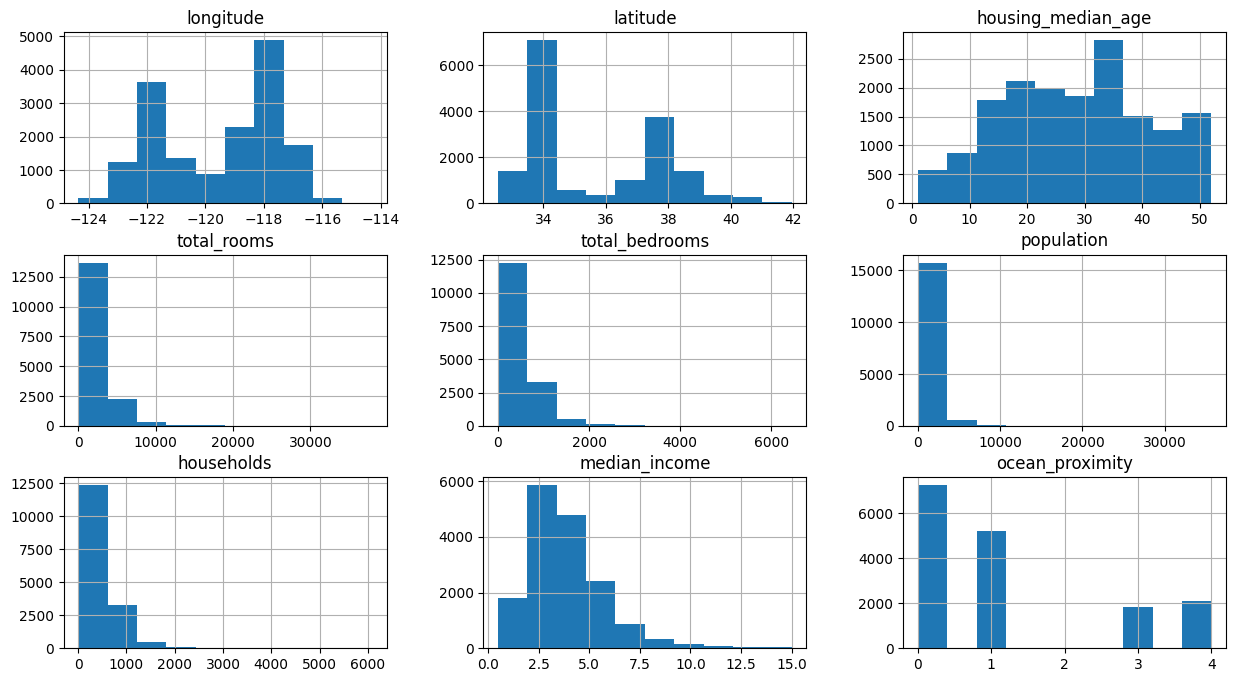

In [9]:
x_train.hist(figsize=(15,8)) #histogram of x part of train data

In [10]:
x_train.corr() #shows co-relation matrix of x part of train data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
longitude,1.000000,-0.925209,-0.110111,0.048570,0.073636,0.104306,0.060314,-0.012759,-0.292451
latitude,-0.925209,1.000000,0.012304,-0.038554,-0.069689,-0.110720,-0.073652,-0.082211,0.204978
housing_median_age,-0.110111,0.012304,1.000000,-0.363113,-0.321456,-0.295907,-0.302746,-0.114402,0.115799
total_rooms,0.048570,-0.038554,-0.363113,1.000000,0.928020,0.853065,0.917444,0.199302,-0.017829
total_bedrooms,0.073636,-0.069689,-0.321456,0.928020,1.000000,0.874133,0.980514,-0.010267,-0.017542
population,0.104306,-0.110720,-0.295907,0.853065,0.874133,1.000000,0.902986,0.001865,-0.072692
households,0.060314,-0.073652,-0.302746,0.917444,0.980514,0.902986,1.000000,0.010572,-0.021381
median_income,-0.012759,-0.082211,-0.114402,0.199302,-0.010267,0.001865,0.010572,1.000000,-0.016775
ocean_proximity,-0.292451,0.204978,0.115799,-0.017829,-0.017542,-0.072692,-0.021381,-0.016775,1.000000


<Axes: >

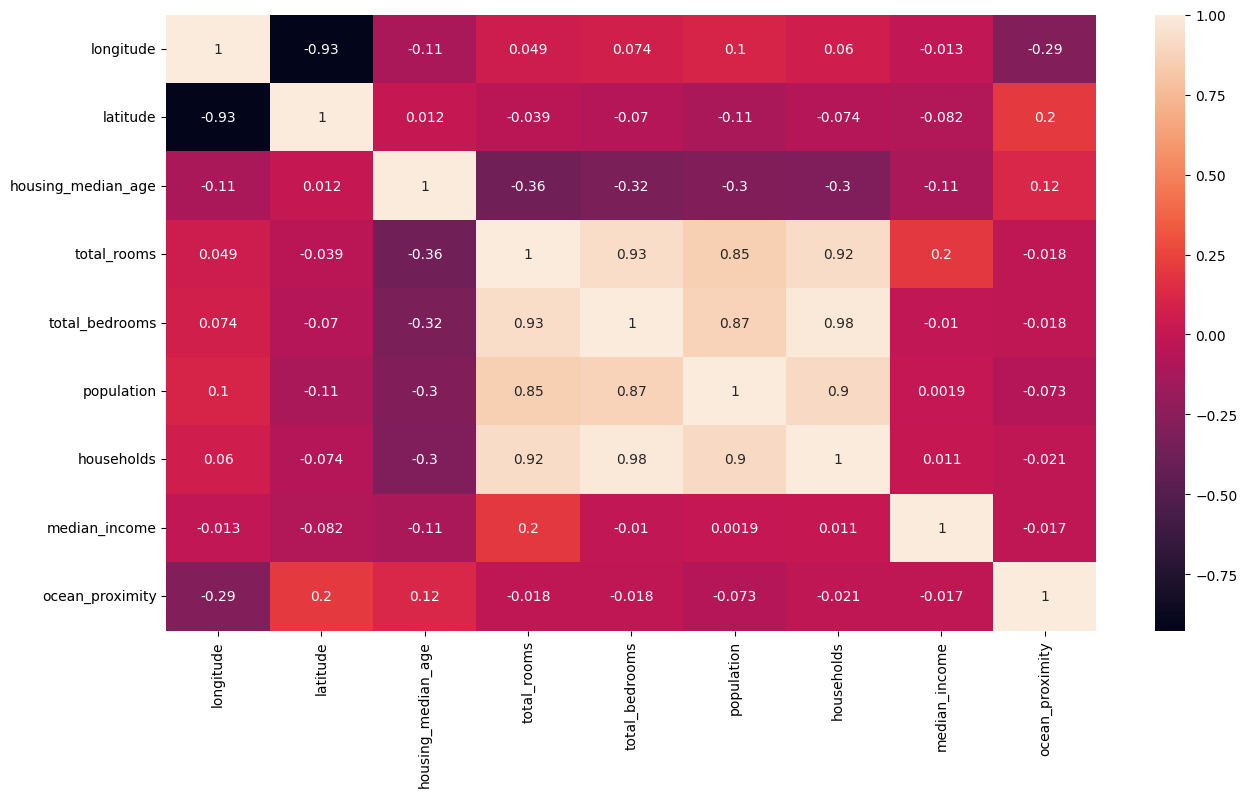

In [11]:
plt.figure(figsize=(15,8))  #defines figure size
sns.heatmap(x_train.corr(), annot=True) #implements heatmap diagram of corelation matrix of x part of train data

In [12]:
train_data=x_train.join(y_train)  #joins x part of train data with y part of train data to form train data

In [13]:
train_data  #shows full train data; first 10 columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,0,500001.0
16493,-121.09,38.03,21.0,2064.0,342.0,1021.0,359.0,4.5170,1,152200.0
14560,-117.22,32.83,31.0,3958.0,727.0,1924.0,728.0,5.4605,4,190200.0
7360,-118.19,33.96,28.0,3507.0,969.0,3740.0,970.0,2.0162,0,142000.0
5682,-118.29,33.72,39.0,2651.0,590.0,1103.0,508.0,3.2740,4,254300.0
...,...,...,...,...,...,...,...,...,...,...
18916,-122.23,38.14,36.0,1412.0,260.0,792.0,268.0,2.3056,3,90400.0
11988,-117.51,34.00,36.0,3791.0,746.0,2258.0,672.0,3.2067,1,124700.0
2551,-124.16,40.77,35.0,2141.0,438.0,1053.0,434.0,2.8529,4,85600.0
6466,-118.04,34.09,34.0,2597.0,461.0,1542.0,470.0,4.6211,1,248900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

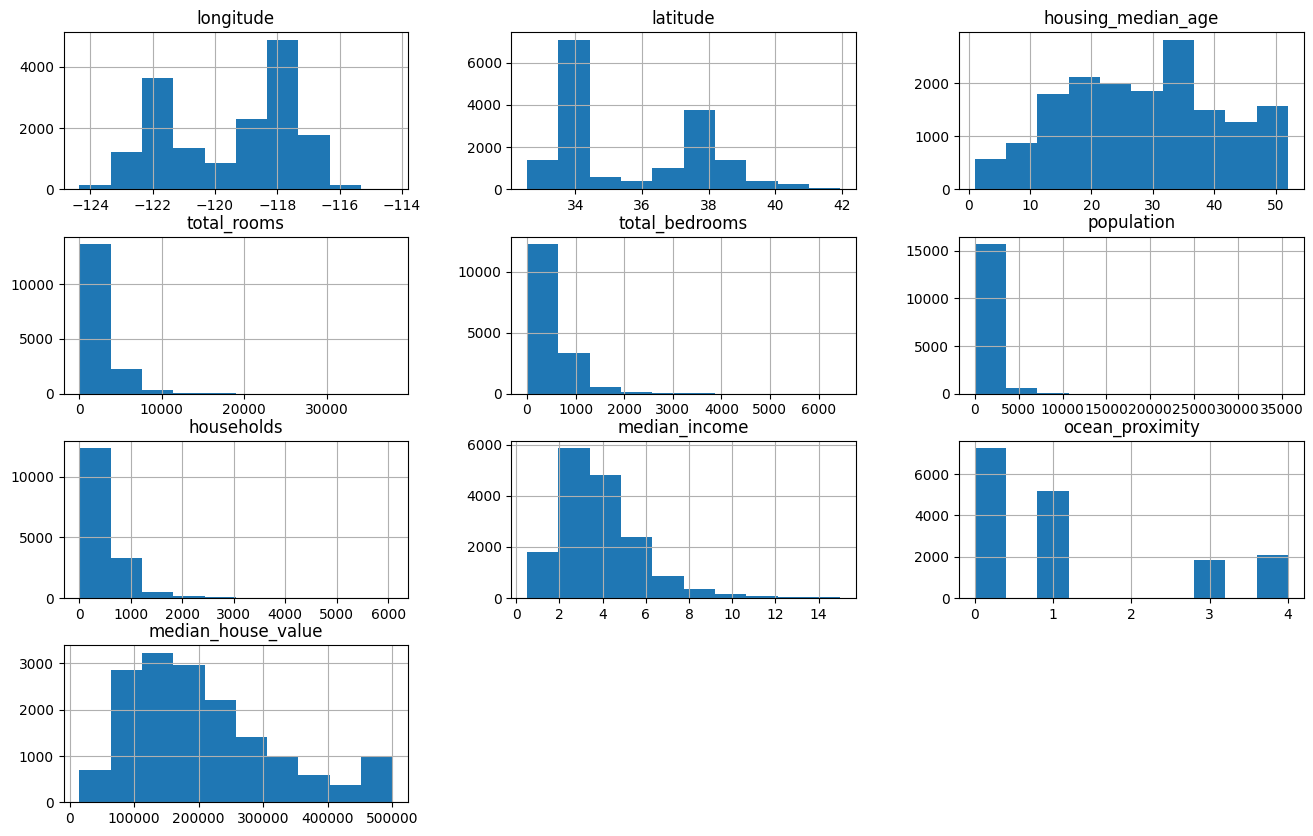

In [14]:
train_data.hist(figsize=(16,10))  #histogram of train data

In [15]:
train_data.corr() #train data corelation matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
longitude,1.000000,-0.925209,-0.110111,0.048570,0.073636,0.104306,0.060314,-0.012759,-0.292451,-0.043730
latitude,-0.925209,1.000000,0.012304,-0.038554,-0.069689,-0.110720,-0.073652,-0.082211,0.204978,-0.145830
housing_median_age,-0.110111,0.012304,1.000000,-0.363113,-0.321456,-0.295907,-0.302746,-0.114402,0.115799,0.106369
total_rooms,0.048570,-0.038554,-0.363113,1.000000,0.928020,0.853065,0.917444,0.199302,-0.017829,0.139839
total_bedrooms,0.073636,-0.069689,-0.321456,0.928020,1.000000,0.874133,0.980514,-0.010267,-0.017542,0.054413
population,0.104306,-0.110720,-0.295907,0.853065,0.874133,1.000000,0.902986,0.001865,-0.072692,-0.020641
households,0.060314,-0.073652,-0.302746,0.917444,0.980514,0.902986,1.000000,0.010572,-0.021381,0.069718
median_income,-0.012759,-0.082211,-0.114402,0.199302,-0.010267,0.001865,0.010572,1.000000,-0.016775,0.690105
ocean_proximity,-0.292451,0.204978,0.115799,-0.017829,-0.017542,-0.072692,-0.021381,-0.016775,1.000000,0.076825
median_house_value,-0.043730,-0.145830,0.106369,0.139839,0.054413,-0.020641,0.069718,0.690105,0.076825,1.000000


<Axes: >

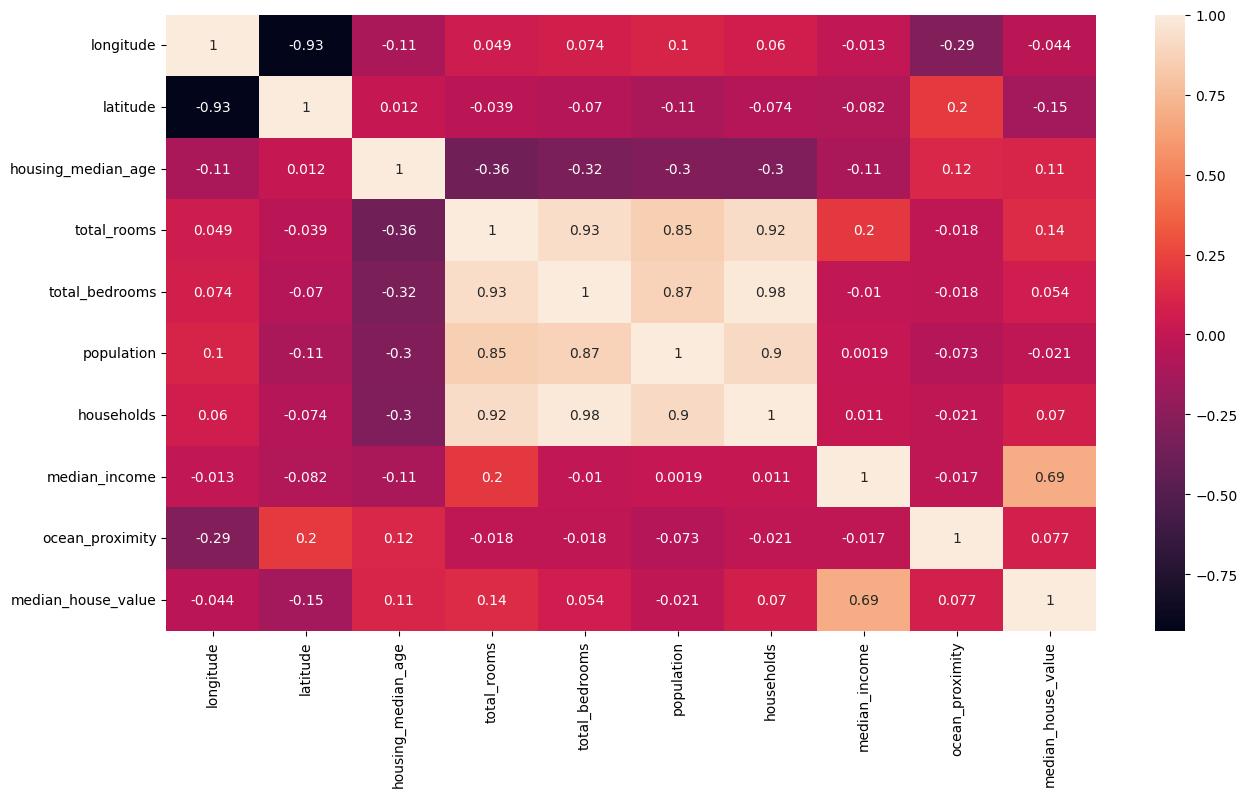

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)  #shows heatmap diagram of train data

In [18]:
scaler = StandardScaler() #scikit tool for regularization
x_train_scaled = scaler.fit_transform(x_train)  #regularization done for x part of train data
x_test_scaled = scaler.transform(x_test)  #regularization done for x part of test data using mean and s.d. from train data

In [19]:
lr=LinearRegression() #linear regression implementation
lr.fit(x_train_scaled, y_train) #train it on scaled data for best-fit

LinearRegression()

In [20]:
lr.score(x_train_scaled, y_train) #accuracy on train data

0.6374147246211352

In [21]:
lr.score(x_test_scaled, y_test) #accuracy on test data

0.6340540833842419

In [22]:
predict=lr.predict(x_test_scaled) #using trained Linear Regression model to predict target value
rmse=np.sqrt(mean_squared_error(y_test, predict)) #to find Root Mean Squared Error

In [23]:
print(f"Linear Regression RMSE: {rmse:.2f}") #show the RMSE

Linear Regression RMSE: 69847.90


In [24]:
print("Example prediction for first row:", lr.predict(x_test_scaled[:1])[0])  #predicted output for 1st row in test set

Example prediction for first row: 139463.91714067687


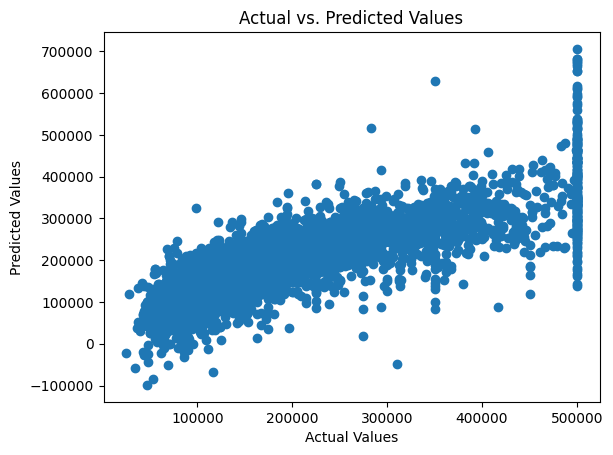

In [25]:
plt.scatter(y_test, predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()  #scatter-plot chart

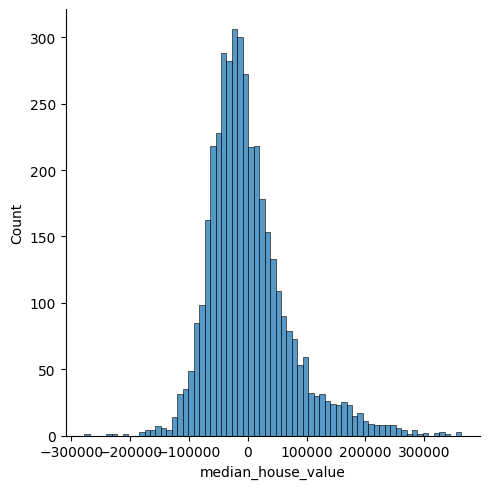

In [26]:
sns.displot(y_test-predict) #dist-plot chart